In [1]:
import numpy as np
import scipy.stats as ss

In [2]:
def mix_gaussians(mu1, mu2, sigma1, sigma2, prob1, num_obs):
    num1 = int(prob1 * num_obs)
    num2 = int(num_obs) - num1
    ret1 = np.random.normal(mu1, sigma1, size=num1)
    ret2 = np.random.normal(mu2, sigma2, size=num2)
    ret = np.append(ret1, ret2, axis=0)
    np.random.shuffle(ret)
    return ret

In [31]:
mu1 = 0.5
sigma1 = 0.1
mu2 = -0.5
sigma2 = 0.1
prob1 = 0.7
num_obs = 1000
ret = mix_gaussians(mu1, mu2, sigma1, sigma2, prob1, num_obs)

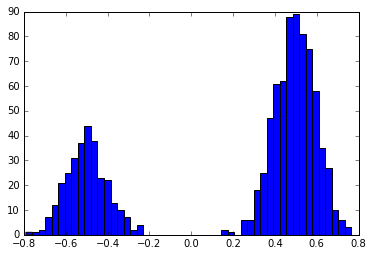

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(ret, bins=50);

In [33]:
def calc_prob_sr(pt, sl, freq, tgt_sr, rf=0.):
    """Calculate required probability wrt target SR
    
    Paramters
    ---------
    pt: float
        Profit Take
    sl: float
        Stop Loss
    freq: float
        Frequency of trading
    tgt_sr: float
        Target Sharpe Ratio
    rf: float, (default 0)
        Risk Free Rate
        
    Returns
    -------
    float: Required probability
    """
    diff = pt - sl
    a = (freq + tgt_sr ** 2) * diff ** 2
    b = diff * (2 * freq * (sl - rf) - tgt_sr ** 2 * diff)
    c = freq * (sl - rf) ** 2
    p = (-b + (b ** 2 - 4 * a * c) ** .5) / (2. * a)
    return p

In [36]:
def prob_failure(ret, freq, tgt_sr):
    """
    Calculate the probability to fail in achieving
    target Sharpe Ratio
    
    Parameters
    ----------
    ret: array-like
        Returns of trading
    freq: float
        Frequency of trading
    tgt_sr: float
        Aiming Sharpe Ratio
    
    Returns
    -------
    risk: float
    """
    r_pos = ret[ret > 0].mean()
    r_neg = ret[ret <= 0].mean()
    p = ret[ret > 0].shape[0] / float(ret.shape[0])
    th_p = calc_prob_sr(r_pos, r_neg, freq, tgt_sr)
    risk = ss.norm.cdf(th_p, p, p * (1 - p))
    return risk

In [42]:
freq = 260
tgt_sr = 2

prob_failure(pd.Series(ret), freq, tgt_sr)

0.2586236383996111

In [40]:
import pandas as pd
pd.DataFrame(ret)

,0
0,0.393682
1,-0.670280
2,0.345316
3,-0.553088
4,0.340982
5,0.607141
6,0.522551
7,0.441311
8,-0.381904
9,-0.483970
